# Quantum Circuit Builder v0

In this notebook we rely on IBM *qiskit* [1], OpenAI *gym* [2] and the library *stable-baselines* [3] to setup a quantum game and have some artificial reinforcement learning agent play and learn them.

We setup a very simple game, *qcircuit-v0*, and we compare the performances of different agents playing it.

## Setup

First of all, let us setup the packages necessary for this simulation as explained in [Setup.ipynb](Setup.ipynb).

Next, let us import some basic libraries.

In [1]:
import numpy as np
import gym

from IPython.display import display

## Importing the game

The game we will run is provided in **gym-qcircuit** [4], and it is implemented complying with the standard OpenAI gym interface. 

The game is a simple *quantum circuit building* game: given a fixed number of qubits and a desired final state for these qubits, the objective is to design a quantum circuit that takes the given qubits to the desired final state. 

In [2]:
import qcircuit

The module **qcircuit** offers two versions of the game:
- *qcircuit-v0*: it presents the player with a single qubit, and it requires to design a simple circuit setting this qubit in a perfect superposition.
- *qcircuit-v1*: a slightly more challenging scenario where the player is presented with two qubits and he/she is requested to design a circuit setting the qubits in the state $\frac{1}{\sqrt{2}}\left|00\right\rangle +\frac{1}{\sqrt{2}}\left|11\right\rangle $.

Details on the implementation of these games are available at https://github.com/FMZennaro/gym-qcircuit/blob/master/qcircuit/envs/qcircuit_env.py.

## qcircuit-v0
We start loading the first scenario and run agents on it.

In [3]:
env = gym.make('qcircuit-v0')

The game *qcircuit-v0* is *completely observed*, and both its *state space* and *action space* are small.

Remember that a single qubit is described by $\alpha\left|0\right\rangle +\beta\left|1\right\rangle$, where $\alpha, \beta$ are complex numbers and $\left|0\right\rangle, \left|1\right\rangle$ are the measurement axes. The state space is then described by four real numbers between -1 and 1 representing the real and complex part of $\alpha, \beta$.

An agent plays the game interacting with a quantum circuit, adding and removing standard gates. In this version of the game there are only three actions available: add an *X gate*, add a *Hadamard gate*, or remove the last inserted gate.

Again, details on the implementation of the state space and the action space are available at https://github.com/FMZennaro/gym-qcircuit/blob/master/qcircuit/envs/qcircuit_env.py.

### Random agent
First, we simply run a random agent. This allows us to test out the game and see its evolution.

A random agent selects a possible action from the action space at random and executes it. Given the limited amount of actions (including the possibility of undoing actions by removing a gate), and the simple objective, the random agent should be able to land on the right circuit in a limited amount of actions. 

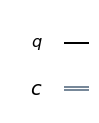

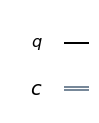

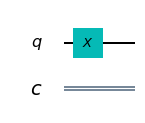

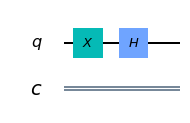

In [4]:
env.reset()
display(env.render())

done = False
while(not done):
    obs, _, done, info = env.step(env.action_space.sample())
    display(info['circuit_img'])
       
env.close()

### PPO2 Agent

We now run a *PPO2* agent, a more sophisticated agent picked from the library of *stable_baselines*.

First we import the agent.

In [5]:
from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import PPO2

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Then we train it.

In [6]:
env = DummyVecEnv([lambda: env])
modelPPO2 = PPO2(MlpPolicy, env, verbose=1)
modelPPO2.learn(total_timesteps=10000)





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



--------------------------------------
| approxkl           | 7.973169e-05  |
| clipfrac           | 0.0           |
| explained_variance | -0.000982     |
| fps                | 22            |
| n_updates          | 1             |
| policy_entropy     | 1.0985414     |
| policy_loss        | -0.0070484644 |
| serial_timesteps   | 128           |
| time_elapsed       | 3.58e-06      |
| total_timesteps    | 128           |
| value_loss         | 3996.909      |
--------------------------------------
--------------------------------------
| approxkl           | 3.2882737e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.000217      |
| fps                | 30            |
| n_updates          | 2             |
| policy_entropy     

-------------------------------------
| approxkl           | 0.0018638866 |
| clipfrac           | 0.0          |
| explained_variance | -0.000548    |
| fps                | 35           |
| n_updates          | 10           |
| policy_entropy     | 1.01555      |
| policy_loss        | -0.04078684  |
| serial_timesteps   | 1280         |
| time_elapsed       | 39.3         |
| total_timesteps    | 1280         |
| value_loss         | 4177.0903    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0021850825 |
| clipfrac           | 0.0          |
| explained_variance | 0.00265      |
| fps                | 22           |
| n_updates          | 11           |
| policy_entropy     | 0.9594531    |
| policy_loss        | -0.039690077 |
| serial_timesteps   | 1408         |
| time_elapsed       | 42.9         |
| total_timesteps    | 1408         |
| value_loss         | 4124.8867    |
-------------------------------------
------------

--------------------------------------
| approxkl           | 1.636944e-05  |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 15            |
| n_updates          | 27            |
| policy_entropy     | 0.055864867   |
| policy_loss        | -0.0025804834 |
| serial_timesteps   | 3456          |
| time_elapsed       | 119           |
| total_timesteps    | 3456          |
| value_loss         | 4127.7583     |
--------------------------------------
--------------------------------------
| approxkl           | 2.8690836e-05 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 29            |
| n_updates          | 28            |
| policy_entropy     | 0.0511804     |
| policy_loss        | -0.0035447306 |
| serial_timesteps   | 3584          |
| time_elapsed       | 128           |
| total_timesteps    | 3584          |
| value_loss         | 4091.4973     |
-------------------------

--------------------------------------
| approxkl           | 9.843582e-06  |
| clipfrac           | 0.0           |
| explained_variance | -0.0959       |
| fps                | 29            |
| n_updates          | 44            |
| policy_entropy     | 0.021820018   |
| policy_loss        | -0.0019928538 |
| serial_timesteps   | 5632          |
| time_elapsed       | 209           |
| total_timesteps    | 5632          |
| value_loss         | 3643.6006     |
--------------------------------------
--------------------------------------
| approxkl           | 1.6955488e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.0952       |
| fps                | 29            |
| n_updates          | 45            |
| policy_entropy     | 0.019816618   |
| policy_loss        | -0.0025166627 |
| serial_timesteps   | 5760          |
| time_elapsed       | 213           |
| total_timesteps    | 5760          |
| value_loss         | 3617.57       |
-------------------------

-------------------------------------
| approxkl           | 4.985035e-13 |
| clipfrac           | 0.0          |
| explained_variance | nan          |
| fps                | 28           |
| n_updates          | 61           |
| policy_entropy     | 0.012709266  |
| policy_loss        | 0.0          |
| serial_timesteps   | 7808         |
| time_elapsed       | 291          |
| total_timesteps    | 7808         |
| value_loss         | 3242.7092    |
-------------------------------------
---------------------------------------
| approxkl           | 3.615873e-10   |
| clipfrac           | 0.0            |
| explained_variance | -3.58e-07      |
| fps                | 26             |
| n_updates          | 62             |
| policy_entropy     | 0.012707609    |
| policy_loss        | -3.6573038e-06 |
| serial_timesteps   | 7936           |
| time_elapsed       | 296            |
| total_timesteps    | 7936           |
| value_loss         | 3217.091       |
--------------------------

-------------------------------------
| approxkl           | 6.620775e-11 |
| clipfrac           | 0.0          |
| explained_variance | nan          |
| fps                | 28           |
| n_updates          | 78           |
| policy_entropy     | 0.008057287  |
| policy_loss        | 0.0          |
| serial_timesteps   | 9984         |
| time_elapsed       | 382          |
| total_timesteps    | 9984         |
| value_loss         | 2889.783     |
-------------------------------------


Last, we test it by letting it play the game.

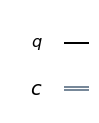

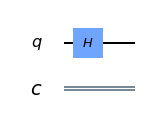

In [7]:
obs = env.reset()
display(env.render())

for _ in range(1):
    action, _states = modelPPO2.predict(obs)
    obs, _, done, info = env.step(action)
    display(info[0]['circuit_img'])
    
env.close()

As expected, the agent easily learned the optimal circuit. 

### A2C Agent

For comparison, we now run an *A2C* agent, another agent from the library of *stable_baselines*.

First we import the agent.

In [8]:
from stable_baselines import A2C

We train it.

In [9]:
modelA2C = A2C(MlpPolicy, env, verbose=1)
modelA2C.learn(total_timesteps=10000)




Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
---------------------------------
| explained_variance | 0.0313   |
| fps                | 7        |
| nupdates           | 1        |
| policy_entropy     | 1.1      |
| total_timesteps    | 5        |
| value_loss         | 9.92e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.00121  |
| fps                | 12       |
| nupdates           | 100      |
| policy_entropy     | 1.1      |
| total_timesteps    | 500      |
| value_loss         | 7.91e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.000339 |
| fps                | 16       |
| nupdates           | 200      |
| policy_entropy     | 1.1      |
| total_timesteps    | 1000     |
| value_loss         | 7.81e+03 |
---------------------------------
---------------------------------
| explained_variance | -0.028

And we test it by letting it play the game.

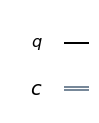

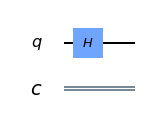

In [10]:
obs = env.reset()
display(env.render())

for _ in range(1):
    action, _states = modelA2C.predict(obs)
    obs, _, done, info = env.step(action)
    display(info[0]['circuit_img'])
    
env.close()

## Comparison of the agents

Finally, we compare the agents quantitavely by contrasting their average reward computed running 1000 episodes of the game. We rely on the *evaluation* module that provides simple and standard routines to evaluate the agents.

In [11]:
import evaluation
n_episodes = 1000

PPO2_perf, _ = evaluation.evaluate_model(modelPPO2, env, num_steps=n_episodes)
A2C_perf, _ = evaluation.evaluate_model(modelA2C, env, num_steps=n_episodes)

env = gym.make('qcircuit-v0')
rand_perf, _ = evaluation.evaluate_random(env, num_steps=n_episodes)

In [12]:
print('Mean performance of random agent (out of {0} episodes): {1}'.format(n_episodes,rand_perf))
print('Mean performance of PPO2 agent (out of {0} episodes): {1}'.format(n_episodes,PPO2_perf))
print('Mean performance of A2C agent (out of {0} episodes): {1}'.format(n_episodes,A2C_perf))

Mean performance of random agent (out of 1000 episodes): 97.674
Mean performance of PPO2 agent (out of 1000 episodes): 99.9
Mean performance of A2C agent (out of 1000 episodes): 99.893


As expected the reinforcement learning agents (PPO2, A2C) learned to play the game optimally. The random agent is still able to play and reach a solution given the small state and action space available; its average reward, however, is clearly inferior; on average it takes the random agent two and half more actions (or guesses) than PPO2/A2C per episode to reach the solution.

## References

[1] IBM qiskit, https://qiskit.org/

[2] OpenAI gym, http://gym.openai.com/docs/

[3] stable-baselines, https://github.com/hill-a/stable-baselines

[4] gym-qcircuit, https://github.com/FMZennaro/gym-qcircuit